## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read the cleaned data

In [2]:
consumption = pd.read_csv('../cleaned_data/consumption.csv',index_col='country')
generation_renewable = pd.read_csv('../cleaned_data/generation_renewable.csv',index_col='country')
generation_norenewable = pd.read_csv('../cleaned_data/generation_fossil.csv',index_col='country')
installations_renewable = pd.read_csv('../cleaned_data/capacity_renewable.csv',index_col='country')
installations_norenewable = pd.read_csv('../cleaned_data/capacity_fossil.csv',index_col='country')
imports = pd.read_csv('../cleaned_data/imports.csv',index_col='country')
exports = pd.read_csv('../cleaned_data/exports.csv',index_col='country')
population = pd.read_csv('../cleaned_data/population.csv',index_col='country')


# 1.Evolution of  countries in renewable energy consumption.

## Plot some important countries as function of:

**Consumption**

**Generation Renewable**

**Generation Fossile**

**Capacity(installations) Renewable**

**Capacity(installations) Fossile**

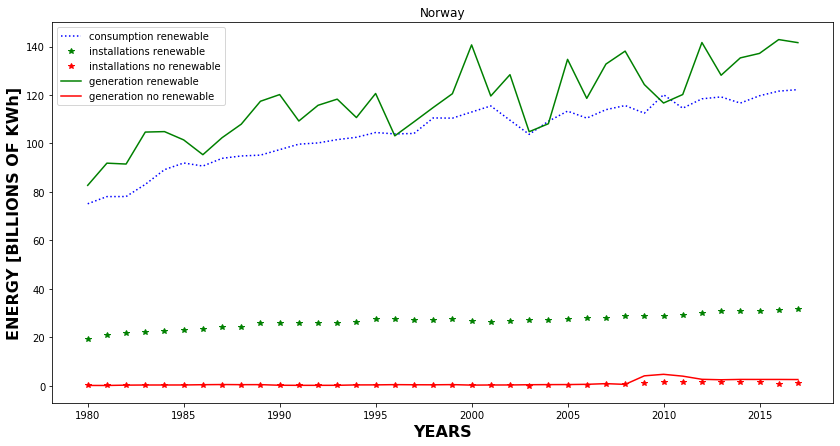

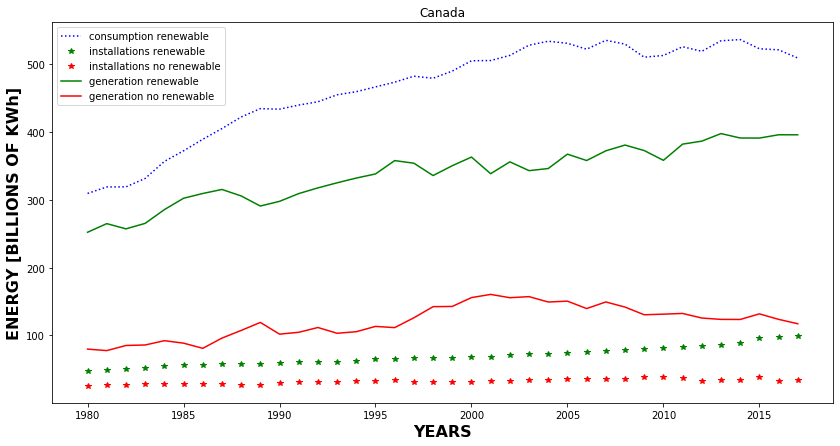

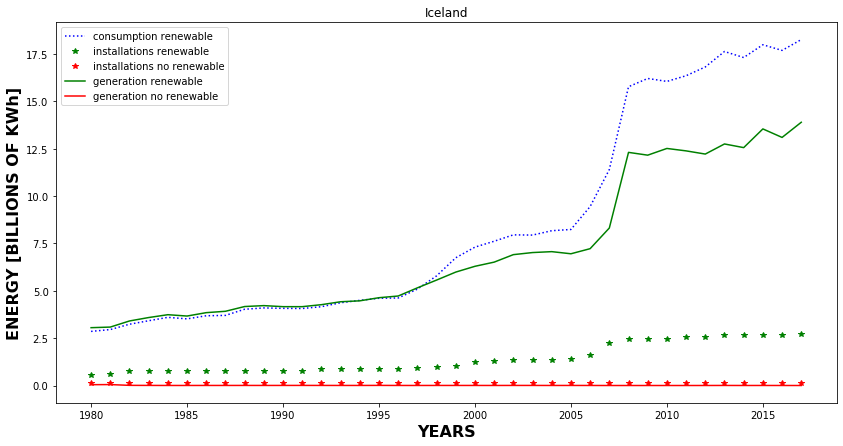

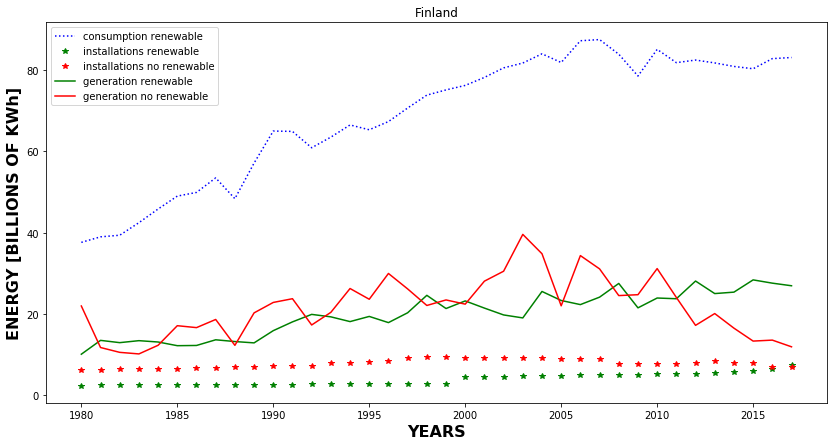

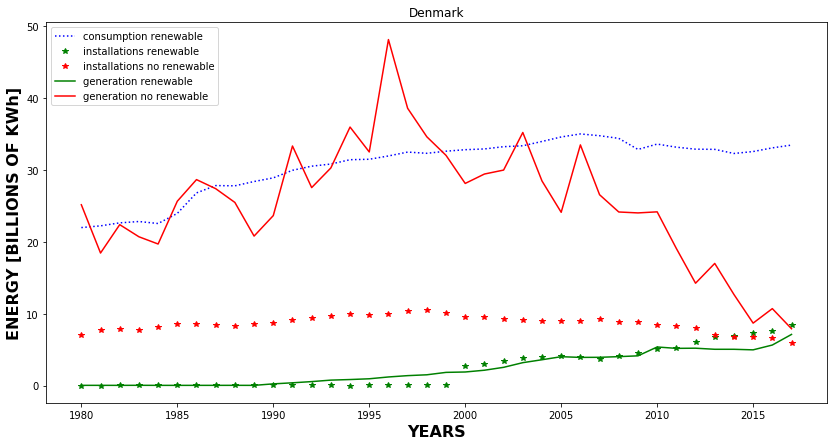

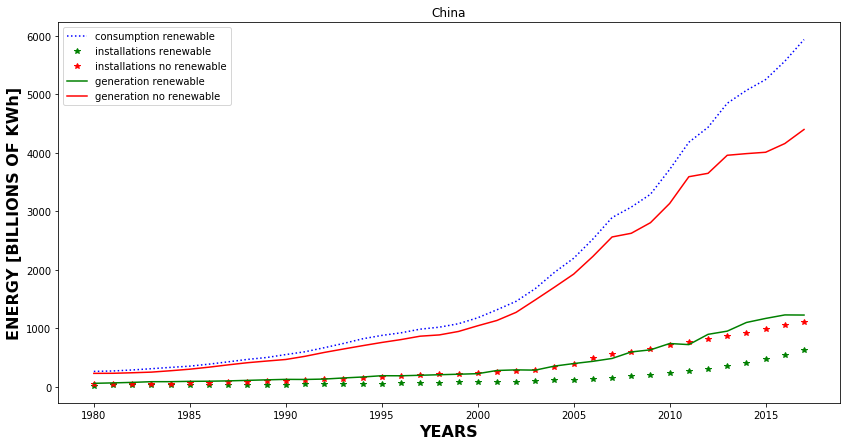

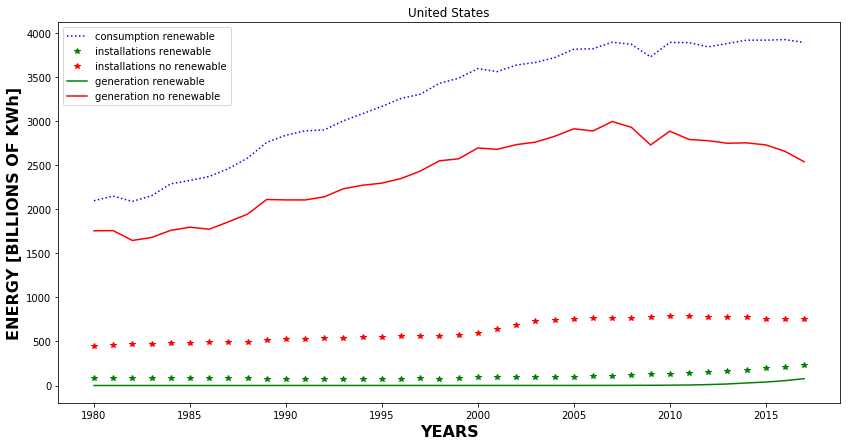

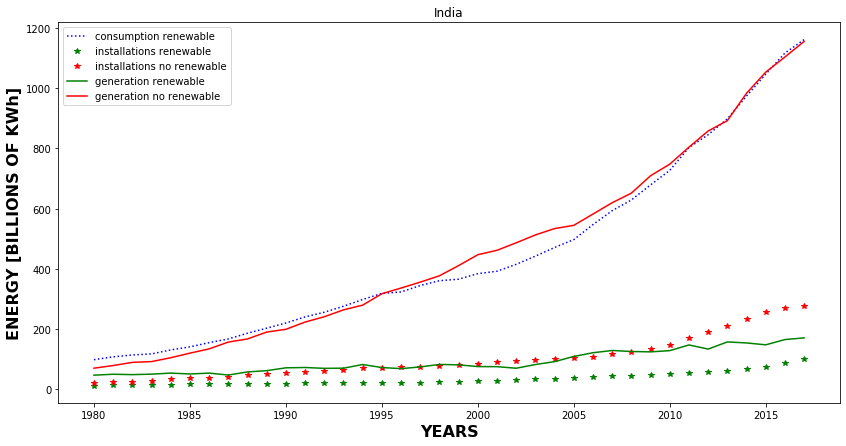

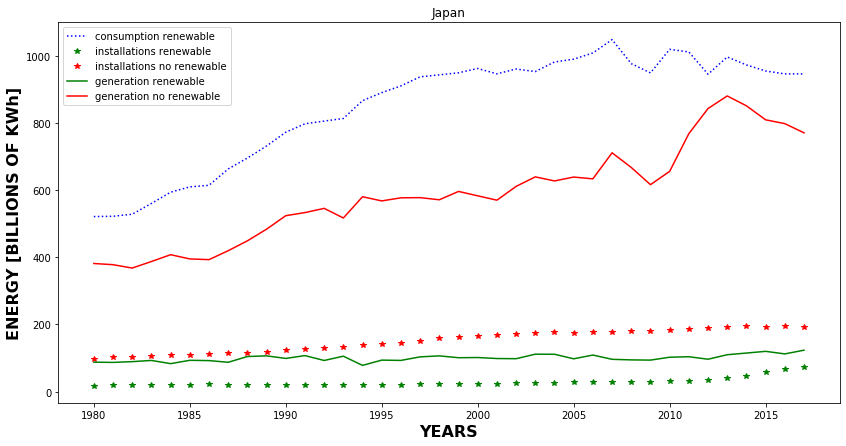

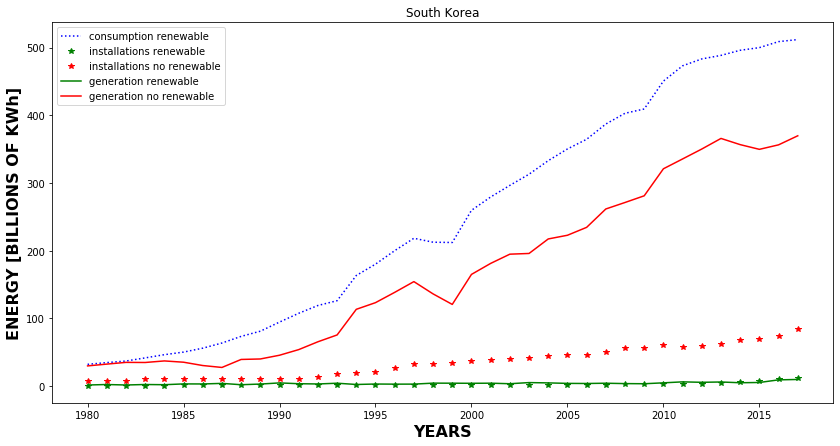

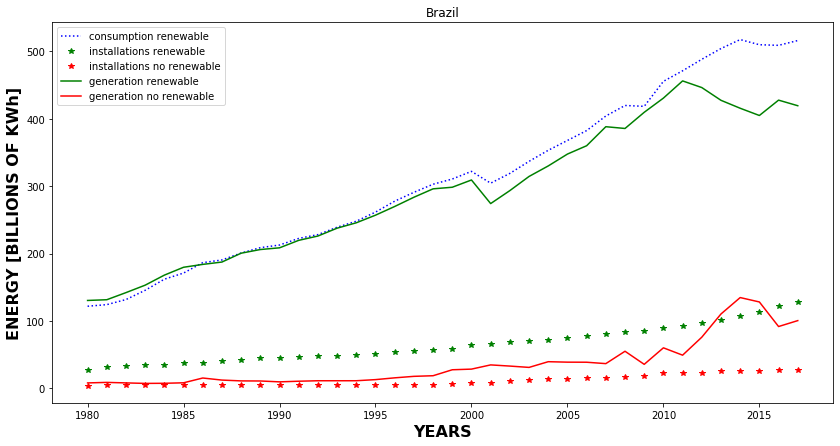

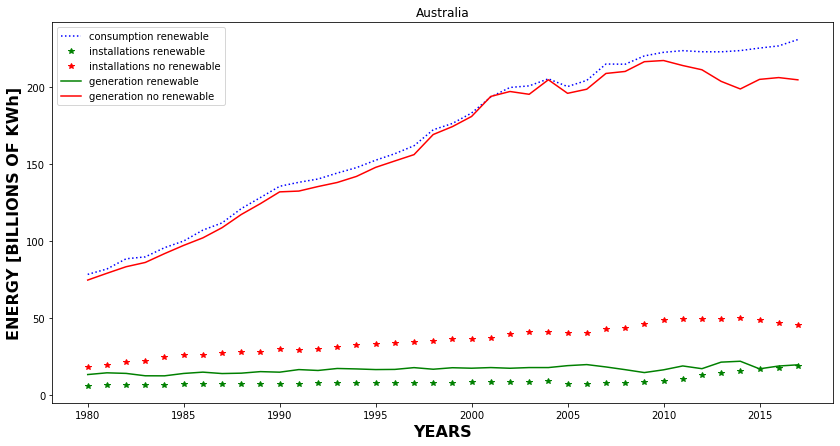

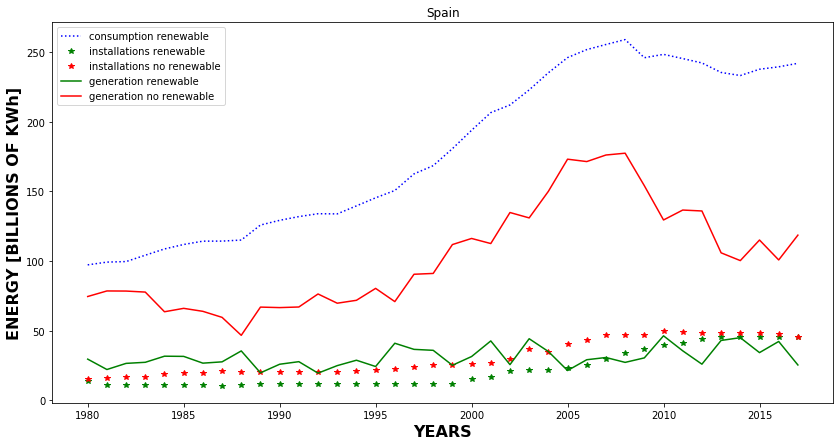

In [73]:
countries= list(['Norway','Canada','Iceland','Finland','Denmark','China','United States','India','Japan','South Korea','Brazil','Australia','Spain'])

t = np.arange(1980,2018,1)

for item in countries:
    fig,ax = plt.subplots(1, figsize=(14,7))
    plt.plot(t,consumption[item:item].T, 'b:', label= 'consumption renewable')
    plt.plot(t,installations_renewable[item:item].T, 'g*', label='installations renewable')
    plt.plot(t,installations_norenewable[item:item].T, 'r*', label='installations no renewable')
    plt.plot(t,generation_renewable[item:item].T, 'g', label='generation renewable')
    plt.plot(t,generation_norenewable[item:item].T, 'r', label='generation no renewable')
    plt.legend = ax.legend(loc='upper left')
    plt.xlabel('YEARS',fontsize=16,fontweight='bold')
    plt.ylabel('ENERGY [BILLIONS OF KWh]',fontsize=16,fontweight='bold')
    plt.title(item)
    fig.savefig(f'../explored_data/plots_countries/{item}.png')

plt.show()


## It can be distinguish two kind of countries: good and bad ones.

## The good countries are where the renewable generation of energy can converge with the net eletricity consumption.

## The bad countries are where the renewable generation of energy is almost impossible to  converge with the net eletricity consumption.

# IMPLEMENTATION IDEA: Through an attribute, system could know if it is worth make the algorithm to predict the sustainability of a country

## Converge feature : 
## Absolute_energic_variation (RE) > Absolute_energic_variation(consumption)
------------------------------------------------------------------------------------------------------------

# 2. Analysis for the *Generation renowable ratio* for all countries (using TABLEAU): 

### Create a 'CLEAN RATIO' that measures the countries which spent more renewable energy from the total consumption

## With this data we show a current pictures of the countries as function of the kind of energy consumped in 2017 as function of total net electricity and population.


In [4]:
GNRE2017 = generation_norenewable[['2017']]
GRE2017 = generation_renewable[['2017']]
consumption2017 = consumption[['2017']]
population2017 = population[['2017']] 
INRE2017 = installations_norenewable[['2017']]
IRE2017 = installations_renewable[['2017']]


#MERGE THE THREE TABLES IN ONE.
difference0 = consumption2017.merge(population2017, how = 'outer',on = 'country',suffixes=('_cons','_RE'))
difference0 = difference0.merge(GRE2017, how = 'outer',on = 'country',suffixes=('_1','_2'))
difference0 = difference0.merge(GNRE2017, how = 'outer',on = 'country',suffixes=('_3','_4'))
difference0 = difference0.merge(IRE2017, how = 'outer',on = 'country',suffixes=('_5','_6'))
ratio = difference0.merge(INRE2017, how = 'outer',on = 'country',suffixes=('_7','_8'))
ratio.rename(columns={'2017_cons':'consumption_2017','2017_RE':'population_2017','2017_3':'gen_renewable_2017','2017_4':'gen_no_renewable_2017','2017_7':'inst_renewable_2017','2017_8':'inst_no_renewable_2017'},inplace=True)

#CREATE FOLLOWING COLUMNS: RATIO CLEAN COUNTRY GENERATION, RATIO CLEAN COUNTRY INSTALLATION, RATIO CONSUMPTION BY POPULATION

ratio['ratio_clean_generation'] = 100*ratio['gen_renewable_2017']/ratio['consumption_2017']
ratio['ratio_clean_installation'] = 100*ratio['inst_renewable_2017']/ratio['consumption_2017']
ratio['ratio_consumption_pop'] = 1000 *ratio['consumption_2017']/ratio['population_2017']
ratio
#DROP THE INITIAL COLUMNS, BECAUSE ARE USELESS TO PROVIDE INFORMATION
ratio.drop('consumption_2017',axis=1,inplace=True)
ratio.drop('gen_renewable_2017',axis=1,inplace=True)
ratio.drop('gen_no_renewable_2017',axis=1,inplace=True)
ratio.drop('inst_renewable_2017',axis=1,inplace=True)
ratio.drop('inst_no_renewable_2017',axis=1,inplace=True)

ratio.dropna(inplace=True)

In [5]:
ratio.to_csv('../explored_data/ratios.csv')

In [6]:
ratio.sample(10)

,population_2017,ratio_clean_generation,ratio_clean_installation,ratio_consumption_pop
country,,,,
Yemen,28247.8500,0.000000,3.003003,0.117885
Jamaica,2888.4240,13.734619,7.183239,1.041052
Suriname,563.0256,65.586035,12.281796,2.848894
Kenya,50235.5200,41.172801,20.361822,0.159548
Sierra Leone,7560.9870,68.940680,50.419303,0.025707
Turkey,81203.2500,24.187112,15.701772,3.052230
Spain,46609.5400,10.457659,18.750981,5.192370
France,66880.4000,13.072817,9.457777,6.809215
Congo-Brazzaville,5272.1560,60.273279,12.044534,0.374799


In [7]:
ratio.ratio_clean_generation.T

country
Afghanistan    18.174831
Albania        89.030207
Algeria         0.091255
Angola         82.120604
Argentina      33.276735
                 ...    
Venezuela      92.380637
Vietnam        43.893051
Yemen           0.000000
Zambia         98.182406
Zimbabwe       52.381564
Name: ratio_clean_generation, Length: 163, dtype: float64

# 4. Compute the annual variation for consumption of energy (net, renewable and fossil).

## Computing the energetic absolute variation  from 1980

In [32]:
def absolute_variation(s):
    return (s / s[0])  

def relative_variation(s):
    rel = []
    for x in range(0,len(s) - 1):
        if x == 0:
            rel.append(s[0])
        rel.append((s.iloc[x+1]/s.iloc[x]))
    return pd.Series(rel)


###  ENERGETIC RELATIVE VARIATION 

In [74]:
##CONSUMPTION
relative_variation_consumption = consumption.apply(relative_variation,axis=1)
relative_variation_consumption.columns = consumption.columns
relative_variation_consumption.dropna(inplace=True)
relative_variation_consumption.drop('1980',axis=1, inplace=True)

##RENEWABLE GENERATION
relative_variation_renewable = generation_renewable.apply(relative_variation,axis=1)
relative_variation_renewable.columns = consumption.columns
relative_variation_renewable.dropna(inplace=True)
relative_variation_renewable.drop('1980',axis=1, inplace=True)
##NON RENEWABLE GENERATION

relative_variation_norenewable = generation_norenewable.apply(relative_variation,axis=1)
relative_variation_norenewable.columns = consumption.columns
relative_variation_norenewable.dropna(inplace=True)
relative_variation_norenewable.drop('1980',axis=1, inplace=True)


/Users/rubenmartinezlorente/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/Users/rubenmartinezlorente/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


In [49]:
###  ENERGETIC RELATIVE VARIATION IN RENEWABLE GENERATION

ZeroDivisionError: integer division or modulo by zero

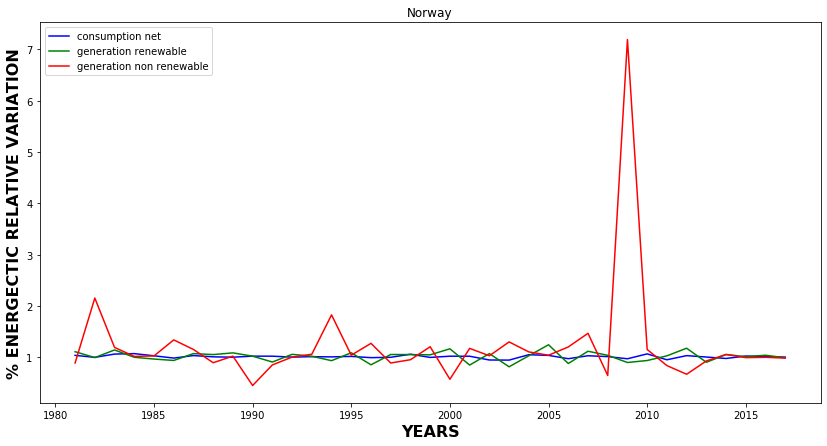

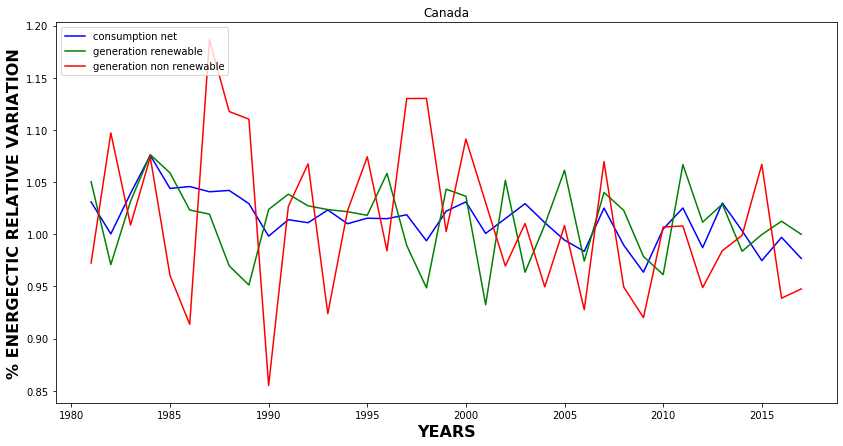

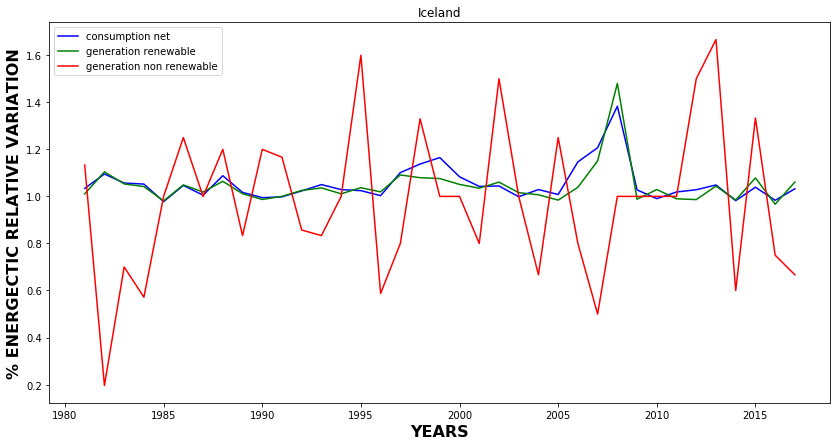

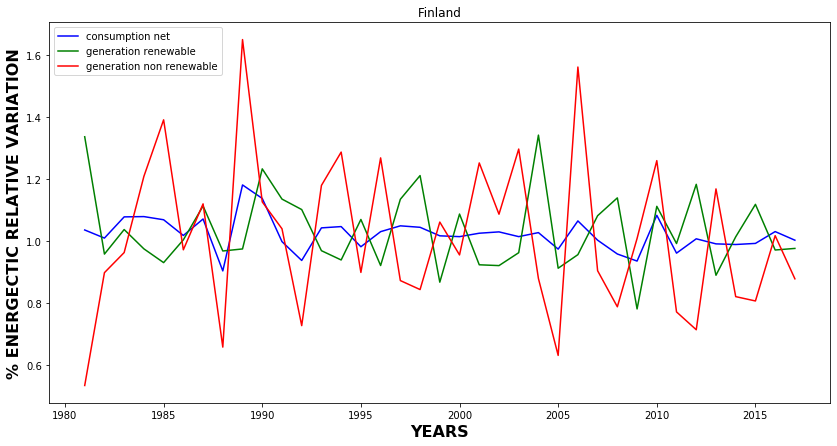

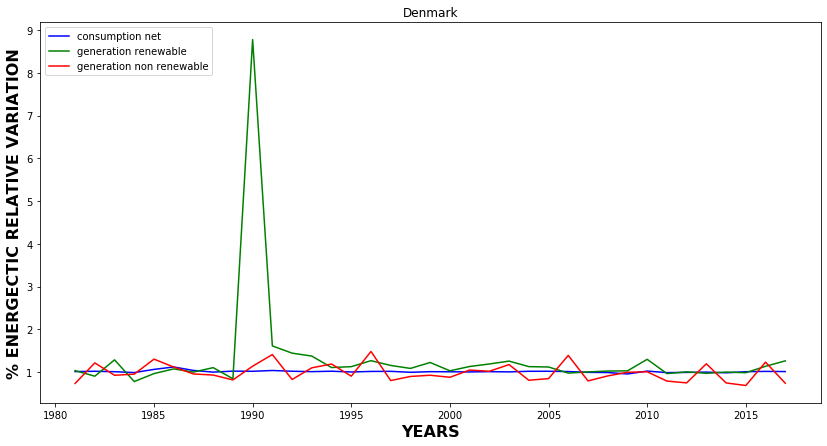

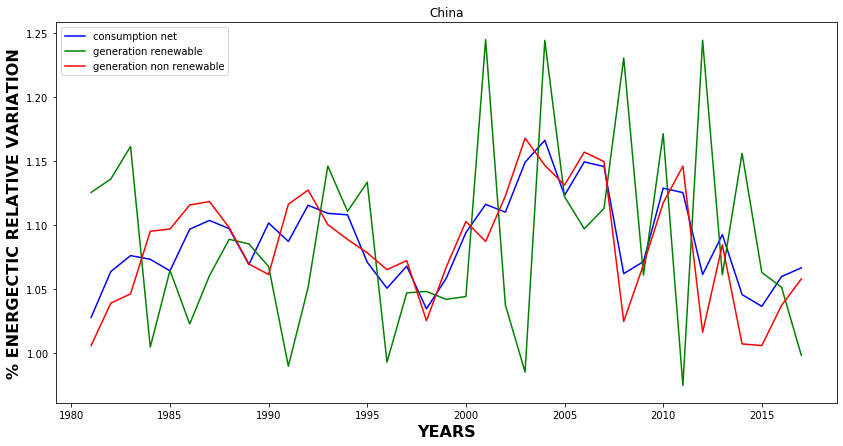

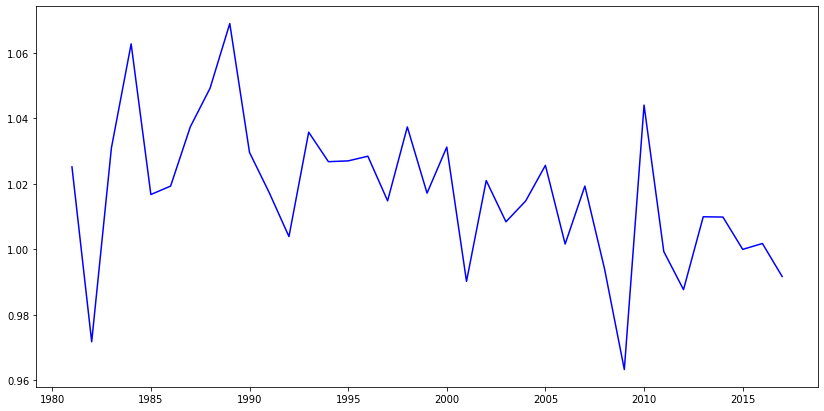

In [77]:
t = np.arange(1981,2018,1)

for item in countries:
    fig,ax = plt.subplots(1, figsize=(14,7))
    plt.plot(t,relative_variation_consumption[item:item].T, 'b', label= 'consumption net')
    plt.plot(t,relative_variation_renewable[item:item].T, 'g', label= 'generation renewable')
    plt.plot(t,relative_variation_norenewable[item:item].T, 'r', label= 'generation non renewable')
    plt.legend = ax.legend(loc='upper left')
    plt.xlabel('YEARS',fontsize=16,fontweight='bold')
    plt.ylabel('% ENERGECTIC RELATIVE VARIATION',fontsize=16,fontweight='bold')
    plt.title(item)
    fig.savefig(f'../explored_data/plots_energetic_relative_variation/{item}.png')
plt.show()


In [15]:
def relative_variation(s):
    rel = []
    for x in range(0,len(s) - 1):
        if x == 0:
            rel.append(s[0])
        rel.append(100*(s.iloc[x+1]/s.iloc[x]))
    return pd.Series(rel)

#relative_variation(consumption)
rel_var = consumption.apply(relative_variation, axis = 1)
rel_var.columns = consumption.columns
rel_var.isnull().sum()

/Users/rubenmartinezlorente/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/rubenmartinezlorente/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.87606,105.307856,95.967742,105.042017,101.900000,101.472031,109.767892,107.312775,88.669951,100.833333,...,95.987943,141.872852,120.485313,124.203370,129.175155,117.202666,102.655355,103.139759,113.610287,104.559390
Albania,2.97400,100.437122,99.799130,99.798725,100.067227,102.082634,99.605133,113.676908,93.141529,107.051482,...,109.718462,106.143597,107.078103,110.426571,85.906660,104.167143,107.776801,103.342845,100.788955,98.473581
Algeria,5.91500,113.491124,115.194399,106.129575,109.162910,108.114745,106.782986,107.502659,107.509668,101.974235,...,107.640727,92.836066,119.512979,112.993165,112.616053,105.417896,108.835970,108.408056,104.426894,107.761488
American Samoa,0.06510,95.714286,100.000000,105.970149,97.183099,120.289855,90.361446,108.000000,112.345679,98.901099,...,101.630435,95.187166,89.325843,97.484277,101.290323,99.363057,100.000000,104.487179,104.294479,98.235294
Angola,0.73600,100.135870,110.583446,102.085890,103.365385,96.046512,107.263923,100.902935,99.888143,100.671892,...,134.216336,113.267544,113.504356,104.179104,109.189521,132.146204,115.588652,101.006258,109.780100,104.791943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,26.83700,120.296605,99.501301,109.388911,105.947807,105.823417,100.903622,108.079893,109.593855,97.971839,...,104.582379,100.253728,105.236015,103.440648,102.950047,101.336884,59.668874,137.140391,89.951827,99.244534
Vietnam,3.28500,107.245053,105.733750,106.040268,101.924051,105.514158,99.811676,106.226415,111.167851,116.277212,...,112.409045,114.092772,113.521216,109.561288,110.767919,102.743245,113.914721,118.974490,111.950220,98.782799
Yemen,0.47100,107.430998,119.960474,109.060956,111.480363,106.097561,121.200511,111.591149,135.221907,100.977654,...,112.412291,101.162290,115.702128,78.043398,101.837889,134.335956,90.113676,80.294343,78.838372,100.543478


In [21]:
dfr.columns = consumption.columns

NameError: name 'dfr' is not defined

In [ ]:
dfr

In [ ]:
0.92256 / 0.87606

In [ ]:
100*(consumption['2017'][0]/consumption['2016'][0])

In [ ]:
consumption['1986']

In [ ]:
consumption